In [9]:
import numpy as np 
import pandas as pd 
import matplotlib 
import matplotlib.pyplot as plt 
import sklearn
sklearn.__version__

'0.23.2'

In [28]:
import cv2
import os

image = []
target_name = []
image_data = []
for root, dirs, files in os.walk("C:\\Users\\AMOZ\\Desktop\\ALX\\final proj\\ML DATASET"):
    for img in files:
        target_name.append(os.path.basename(img).split(" ")[0])
        pathe = os.path.join("C:\\Users\\AMOZ\\Desktop\\ALX\\final proj\\ML DATASET\\", img)
        img = image.append(pathe)
        img = cv2.imread(pathe, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (150, 150))
        image_data.append(img)

In [29]:
#convert dataset to float then check the number of dataset

image_array = np.array(image_data, dtype='float32')
image_array.shape

(200, 150, 150)

In [14]:
#to reshape the size of the dataset

image_array = image_array.reshape(200, 150*150)

In [15]:
print(len(image_array))
image_array.shape

200


(200, 22500)

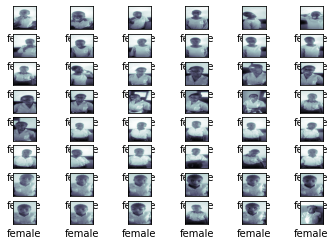

In [16]:
# Let’s display few dataset to see what we’re working with:
fig, ax = plt.subplots(8, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(image_data[i], cmap='bone')
    axi.set(xticks=[], yticks=[], xlabel=target_name[i])

In [18]:
#import the model for test

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(image_array, target_name, test_size=0.2, random_state=0)

In [19]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline
pca = RandomizedPCA(n_components=150, svd_solver='randomized', whiten=True)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [21]:
model.fit(Xtrain, ytrain)

Pipeline(steps=[('pca',
                 PCA(n_components=150, svd_solver='randomized', whiten=True)),
                ('svc', SVC(class_weight='balanced'))])

In [22]:
ypred = model.predict(Xtest)

In [23]:
#lets display the report of the dataset

from sklearn.metrics import classification_report
print(classification_report(ytest, ypred, target_names=["female", "male"]))

              precision    recall  f1-score   support

      female       0.86      0.62      0.72        39
        male       0.83      0.95      0.88        77

    accuracy                           0.84       116
   macro avg       0.84      0.78      0.80       116
weighted avg       0.84      0.84      0.83       116



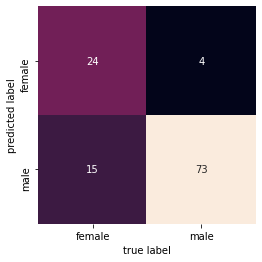

In [24]:
#lets display the outcome of the table

from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=["female", "male"], 
            yticklabels=["female", "male"])
plt.xlabel('true label')
plt.ylabel('predicted label');

In [13]:
#let's start the prediction

new_data = Xtest[50].reshape(1, 22500)
print(len(ytest))
print(ytest[40])

116
female


In [110]:
def predict(new_data):
    ypred = model.predict(new_data)
    return ypred[0]

predict(new_data)

'male'